## Steps performed on case study
- Loading data set
- Data cleaning
- Imputing null values
- Filtering high value customers
- Deriving target variable
- New predictor variable derivation
- EDA
- Data preparation
- Logistic Regression
- PCA
- Decision tree
- Random forest
- XGBoost
- Feature importance and business conclusions

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# import required libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve ,confusion_matrix , precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

## Loading the data set

In [3]:
# read data
churn = pd.read_csv("telecom_churn_data.csv")

In [4]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
churn.shape

(99999, 226)

In [6]:
churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

As observed, there are 99999 rows and 226 columns in the dataset.

In [7]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [8]:
#Differentiating columns based upon type
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

print('Number of ID columns: {0}'.format(len(id_cols)))
print('Number of Date columns: {0}'.format(len(date_cols)))
print('Number of Category columns: {0}'.format(len(cat_cols)))
print('Number of Numercical columns: {0}'.format(len(num_cols)))
print('Total columns in dataset: {0}'.format(churn.shape[1]))

Number of ID columns: 2
Number of Date columns: 12
Number of Category columns: 8
Number of Numercical columns: 204
Total columns in dataset: 226


## Missing values inspection

In [9]:
#Percentage of missing values column-wise
round(churn.isnull().sum()*100/churn.shape[0], 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Imputing null values

In [10]:
#Recharge related columns
recharge_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
                 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
                 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
                 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
                 ]

churn[recharge_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,63.156252,59.385804,62.641716,43.901249
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,97.356649,95.915385,104.431816,90.809712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,30.000000,30.000000,30.000000,0.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,110.000000,110.000000,130.000000,50.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000


In [11]:
churn[recharge_cols].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
date_of_last_rech_6    1607
date_of_last_rech_7    1767
date_of_last_rech_8    3622
date_of_last_rech_9    4760
last_day_rch_amt_6        0
last_day_rch_amt_7        0
last_day_rch_amt_8        0
last_day_rch_amt_9        0
dtype: int64

Getting the recharge amount for which recharge date is not present

In [12]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_6.isnull(), 
                         ['total_rech_num_6', 'date_of_last_rech_6']].count()

total_rech_num_6       1607
date_of_last_rech_6       0
dtype: int64

In [13]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_7.isnull(), 
                         ['total_rech_num_7', 'date_of_last_rech_7']].count()

total_rech_num_7       1767
date_of_last_rech_7       0
dtype: int64

In [14]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_8.isnull(), 
                         ['total_rech_num_8', 'date_of_last_rech_8']].count()

total_rech_num_8       3622
date_of_last_rech_8       0
dtype: int64

In [15]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_9.isnull(), 
                         ['total_rech_num_9', 'date_of_last_rech_9']].count()

total_rech_num_9       4760
date_of_last_rech_9       0
dtype: int64

#### As observed, recharge value is 0 for when the recharge date is not present. So this is a meaningful missing, we leave it as it is since we will drop the recharge dates later

## Analysing data recharge features

In [16]:
#We observed that the recharge data columns have around 74% null values, but we need this feature to later 
#filter out high value customers. Hence, replacing the null values with 0.0

churn['total_rech_data_6'] = churn['total_rech_data_6'].replace(np.NaN,0.0)

churn['total_rech_data_7'] = churn['total_rech_data_7'].replace(np.NaN,0.0)

churn['total_rech_data_8'] = churn['total_rech_data_8'].replace(np.NaN,0.0)

churn['av_rech_amt_data_6'] = churn['av_rech_amt_data_6'].replace(np.NaN,0.0)

churn['av_rech_amt_data_7'] = churn['av_rech_amt_data_7'].replace(np.NaN,0.0)

churn['av_rech_amt_data_8'] = churn['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [17]:
#adding new column total recharge amount for data: total_rech_amt_data for filtering High Value customer later

churn['total_rech_amt_data_6'] = churn.av_rech_amt_data_6 * churn.total_rech_data_6

churn['total_rech_amt_data_7'] = churn.av_rech_amt_data_7 * churn.total_rech_data_7

churn['total_rech_amt_data_8'] = churn.av_rech_amt_data_8 * churn.total_rech_data_8

In [18]:
#We can drop the avg recharge amount and total recharge amount columns
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
churn.drop(cols_to_drop, axis = 1, inplace = True)

### Replacing NaN in categorical columns

In [19]:
# replacing Nan in categorical columns with new category '-1'
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna('-1'))

In [20]:
round(churn[cat_cols].isnull().sum() * 100 / churn.shape[0], 2)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

### Dropping columns with high percentage of missing

In [21]:
#dropping columns with more than 50% missing values
MISSING_THRESHOLD = 0.5
include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))
churn = churn.loc[:, include_cols]
churn.shape

(99999, 197)

In [22]:
include_cols.count(False)

26

### Dropping ID and Date columns

In [23]:
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9'
            ]
churn = churn.drop(date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape after dropping:  (99999, 189)


### Imputing using IterativeImputer

In [24]:
dropped_cols = ['max_rech_data_9', 'count_rech_2g_6', 'max_rech_data_6', 'av_rech_amt_data_7', 'count_rech_3g_7', 
                'arpu_3g_9', 'total_rech_data_8', 'arpu_2g_9', 'arpu_2g_8', 'count_rech_3g_8', 'count_rech_3g_9', 
                'total_rech_data_6', 'arpu_3g_8', 'max_rech_data_8', 'arpu_3g_6', 'count_rech_2g_8', 'arpu_2g_6', 
                'max_rech_data_7', 'total_rech_data_7', 'arpu_2g_7', 'total_rech_data_9', 'count_rech_2g_7', 
                'av_rech_amt_data_9', 'av_rech_amt_data_6', 'arpu_3g_7', 'count_rech_2g_9', 'av_rech_amt_data_8', 
                'count_rech_3g_6']
num_cols = [x for x in num_cols if x not in dropped_cols]
churn[num_cols].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,4

In [25]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [26]:
churn_cols = churn.columns
imputer = IterativeImputer(max_iter = 2, random_state = 10)
df_stg = churn.copy()
df_stg.drop(id_cols, axis=1, inplace=True)
churn_imputed = imputer.fit_transform(df_stg)

In [27]:
# convert imputed numpy array to pandas dataframe
churn_filtered = pd.DataFrame(churn_imputed, columns=churn_cols.drop(id_cols))
print(churn_filtered.isnull().sum()*100/churn_filtered.shape[0])

loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou

## High-value customers

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [30]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 187 columns):
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64

In [31]:
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-115.413456,-69.438044,0.00,-116.707886,172.552412,149.024516,0.00,148.193771,43.866346,27.174658,0.00,27.771829,15.25543,0.338317,0.00,-2.895181,-64.907084,-81.610558,0.00,-88.017458,93.309287,91.37702,0.00,90.395155,3.780231,3.806711,0.00,3.703538,2.035007,-5.117969,0.00,-0.802791,4.682068,-16.08022,0.00,-17.364149,44.371407,45.583016,0.00,45.230421,87.120501,90.59602,0.00,86.330537,1.19604,1.194964,0.00,1.08196,0.0,0.0,0.0,0.0,121.377038,126.689008,0.00,123.568934,-114.734338,-104.393803,0.0,-94.747758,3.911622,4.973771,0.00,4.404337,0.444302,0.047124,0.0,0.049352,0.00,0.00,0.00,0.00,-43.80862,-50.572336,0.16,-45.920553,107.484858,107.11719,4.13,106.1737,12.073372,12.592415,1.15,12.163981,62.957863,57.729188,5.44,61.64361,-18.463198,-19.424842,0.00,-18.586838,20.715317,21.653099,0.00,19.617493,2.162352,2.22028,0.00,2.175456,0.0,0.0,0.0,0.0,0.433217,1.140493,0.00,0.108694,0.00,0.00,5.44,0.00,-67.043578,-64.313245,0.0,-66.83736,7.805556,8.134599,0.0,8.08457,0.854149,1.011275,0.0,1.017639,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.

In [32]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn_filtered['avg_rech_amt_6_7'] = (churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_data_6
                                    + churn_filtered.total_rech_amt_7 + churn_filtered.total_rech_amt_data_7) / 2
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-115.413456,-69.438044,0.00,-116.707886,172.552412,149.024516,0.00,148.193771,43.866346,27.174658,0.00,27.771829,15.25543,0.338317,0.00,-2.895181,-64.907084,-81.610558,0.00,-88.017458,93.309287,91.37702,0.00,90.395155,3.780231,3.806711,0.00,3.703538,2.035007,-5.117969,0.00,-0.802791,4.682068,-16.08022,0.00,-17.364149,44.371407,45.583016,0.00,45.230421,87.120501,90.59602,0.00,86.330537,1.19604,1.194964,0.00,1.08196,0.0,0.0,0.0,0.0,121.377038,126.689008,0.00,123.568934,-114.734338,-104.393803,0.0,-94.747758,3.911622,4.973771,0.00,4.404337,0.444302,0.047124,0.0,0.049352,0.00,0.00,0.00,0.00,-43.80862,-50.572336,0.16,-45.920553,107.484858,107.11719,4.13,106.1737,12.073372,12.592415,1.15,12.163981,62.957863,57.729188,5.44,61.64361,-18.463198,-19.424842,0.00,-18.586838,20.715317,21.653099,0.00,19.617493,2.162352,2.22028,0.00,2.175456,0.0,0.0,0.0,0.0,0.433217,1.140493,0.00,0.108694,0.00,0.00,5.44,0.00,-67.043578,-64.313245,0.0,-66.83736,7.805556,8.134599,0.0,8.08457,0.854149,1.011275,0.0,1.017639,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

In [33]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn_filtered.avg_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [34]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn_filtered.loc[churn_filtered.avg_rech_amt_6_7 > churn_filtered.avg_rech_amt_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(29953, 188)

In [35]:
churn_filtered = churn_filtered.drop('avg_rech_amt_6_7', axis = 1)
churn_filtered.shape

(29953, 187)

#### As observed, after filteration, we are left with 29953 rows and 187 columns

## Deriving churn value

The customers who do not have any call recharge and data recharge are considered to have churned

In [36]:
#Calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [37]:
#Calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [38]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_calls_mou_9,total_internet_mb_9,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-115.413456,-69.438044,0.00,-116.707886,172.552412,149.024516,0.00,148.193771,43.866346,27.174658,0.00,27.771829,15.25543,0.338317,0.00,-2.895181,-64.907084,-81.610558,0.00,-88.017458,93.309287,91.37702,0.00,90.395155,3.780231,3.806711,0.00,3.703538,2.035007,-5.117969,0.00,-0.802791,4.682068,-16.08022,0.00,-17.364149,44.371407,45.583016,0.00,45.230421,87.120501,90.59602,0.00,86.330537,1.19604,1.194964,0.00,1.081960,0.0,0.0,0.0,0.0,121.377038,126.689008,0.00,123.568934,-114.734338,-104.393803,0.00,-94.747758,3.911622,4.973771,0.00,4.404337,0.444302,0.047124,0.0,0.049352,0.00,0.00,0.00,0.00,-43.80862,-50.572336,0.16,-45.920553,107.484858,107.11719,4.13,106.173700,12.073372,12.592415,1.15,12.163981,62.957863,57.729188,5.44,61.643610,-18.463198,-19.424842,0.00,-18.586838,20.715317,21.653099,0.00,19.617493,2.162352,2.22028,0.00,2.175456,0.0,0.0,0.0,0.0,0.433217,1.140493,0.00,0.108694,0.00,0.00,5.44,0.00,-67.043578,-64.313245,0.0,-66.837360,7.805556,8.134599,0.00,8.084570,0.854149,1.011275,0.00,1.017639,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [39]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [40]:
# print churn ratio
print('Churn class')
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn class
0    91.877274
1     8.122726
Name: churn, dtype: float64


#### As observed, there is high class imbalance in churning. There is a 92:8 ratio

## Delete columns that are related to 9th month

In [41]:
# delete all features relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(29953, 144)

### Updating the categorical and numerical columns

In [42]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns
print(col_9_names)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')


In [43]:
# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

print('Categorical columns: ' , len(cat_cols))
print(cat_cols)
print()
print('Numerical columns: ' , len(num_cols))
print(num_cols)

Categorical columns:  6
['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

Numerical columns:  138
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou

In [44]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [45]:
churn_filtered.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 144 columns):
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64

## New variables derivation

Since 8th month is the deciding month for the customer whether he will churn or not, let's try to find some differences between recharge and daat usage by the customer. We will calculate difference in behavior for all different types of column

In [46]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['monthly_3g_diff'] = churn_filtered.monthly_3g_8 - ((churn_filtered.monthly_3g_6 + churn_filtered.monthly_3g_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

In [47]:
churn_filtered.shape

(29953, 149)

## Remove columns with no variance

In [48]:
for col in churn_filtered.columns:
    if churn_filtered[col].nunique() == 1:
        print("Column", col ,"has no variance and contains only ", churn_filtered[col].nunique()," unique value")
        print("Dropping the column", col)
        print()
        churn_filtered.drop(col, axis = 1, inplace = True)

print("Shape of the updated dataset:", churn_filtered.shape)

Column loc_og_t2o_mou has no variance and contains only  1  unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only  1  unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only  1  unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_6 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_8

Column std_ic_t2o_mou_6 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mou_6

Column std_ic_t2o_mou_7 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mou_7

Column std_ic_t2o_mou_8 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mo

## Remove highly correlated columns

In [49]:
#Selecting columns which have absolute correlation greater than 60%
# Create correlation matrix
corr_matrix = churn_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Drop features 
churn_filtered.drop(to_drop, axis = 1, inplace = True)

In [50]:
churn_filtered.shape

(29953, 59)

## Updating the category and numerical columns

In [51]:
cat_cols = churn_filtered.select_dtypes('category').columns
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

### dropping highly skewed columns

In [52]:
skewnessThreshold = 80
def RemoveSkewedColumn(col, type):
    if col == 'churn':
        return
    count_dict = (round(churn_filtered[col].value_counts(normalize = True) * 100, 2)).to_dict()
    IsSkewed = list(map(lambda x: x >= 80, count_dict.values()))
    if IsSkewed.count(True) > 0:
        print(col, "Skewness:")
        #print(count_dict)
        churn_filtered.drop(col, axis = 1, inplace = True)
        print('Due to high skewness, this column was dropped')
        print()
    else:
        if type == 'category':
            #change type of column to category
            churn_filtered[col] = churn_filtered[col].astype('category')

In [53]:
for col in num_cols:
    RemoveSkewedColumn(col, 'numeric')

roam_ic_mou_7 Skewness:
Due to high skewness, this column was dropped

roam_og_mou_7 Skewness:
Due to high skewness, this column was dropped

std_og_t2f_mou_6 Skewness:
Due to high skewness, this column was dropped

isd_og_mou_6 Skewness:
Due to high skewness, this column was dropped

og_others_7 Skewness:
Due to high skewness, this column was dropped

og_others_8 Skewness:
Due to high skewness, this column was dropped

spl_ic_mou_7 Skewness:
Due to high skewness, this column was dropped

spl_ic_mou_8 Skewness:
Due to high skewness, this column was dropped

monthly_2g_6 Skewness:
Due to high skewness, this column was dropped

monthly_2g_7 Skewness:
Due to high skewness, this column was dropped

monthly_2g_8 Skewness:
Due to high skewness, this column was dropped

sachet_3g_6 Skewness:
Due to high skewness, this column was dropped

sep_vbc_3g Skewness:
Due to high skewness, this column was dropped



In [54]:
cat_cols = churn_filtered.select_dtypes('category').columns
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

In [55]:
churn_filtered.shape

(29953, 46)

In [56]:
churn_filtered.head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,fb_user_6,fb_user_7,fb_user_8,aon,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn,arpu_diff,onnet_mou_diff,monthly_3g_diff,roam_ic_mou_diff,roam_og_mou_diff
0,197.385,-115.413456,172.552412,43.866346,-64.907084,93.309287,3.780231,2.035007,-5.117969,0.00,3.911622,4.973771,0.00,0.444302,-43.80862,107.484858,12.073372,-18.463198,20.715317,2.162352,-67.043578,7.805556,0.854149,4.0,252.0,252.0,252.0,30.13,83.57,0.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,252.0,252.0,252.0,1,7.7025,92.42575,0.0,-35.520502,-7.796874
1,1069.180,57.840000,453.430000,16.230000,51.390000,308.630000,62.130000,0.000000,0.000000,0.00,4.500000,0.000000,6.50,0.000000,58.14000,217.560000,152.160000,36.890000,91.440000,52.190000,0.210000,2.060000,15.740000,5.0,1580.0,790.0,1580.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,802.0,0.0,0.0,0.0,1,1961.9650,-3.97000,0.0,6.780000,19.895000
2,378.721,413.690000,94.660000,0.000000,297.130000,80.960000,0.000000,0.000000,0.000000,7.15,0.000000,0.000000,10.23,0.000000,23.84000,57.580000,0.000000,0.000000,22.430000,0.000000,0.000000,0.000000,0.000000,19.0,90.0,154.0,30.0,0.00,0.00,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,315.0,0.0,354.0,207.0,0,-298.1100,-347.28000,0.0,0.000000,0.000000
3,514.453,102.410000,757.930000,0.000000,4.480000,91.810000,0.750000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,2.48000,118.230000,4.610000,14.060000,67.690000,0.000000,0.000000,0.000000,0.000000,22.0,50.0,50.0,50.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,720.0,0.0,0.0,0.0,0,81.6570,-32.12000,0.0,0.000000,0.000000
4,74.350,48.960000,85.410000,0.000000,48.960000,82.940000,0.000000,0.000000,0.000000,17.71,0.100000,0.000000,17.71,0.000000,20.71000,95.910000,0.000000,0.510000,2.430000,0.000000,0.000000,0.000000,0.000000,3.0,0.0,179.0,179.0,0.00,0.00,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,604.0,0.0,712.0,540.0,0,232.8425,-16.23000,0.0,0.000000,0.000000


## Exploratory data analysis

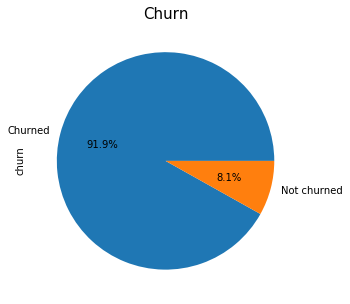

In [57]:
# plot the churn ratio
plt.figure(figsize = [5,5])
plt.title('Churn', fontsize = 15)
churn_filtered.churn.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Churned', 'Not churned'])
plt.show()

#### As observed, there is a class imbalance in the target variable, i.e., churn

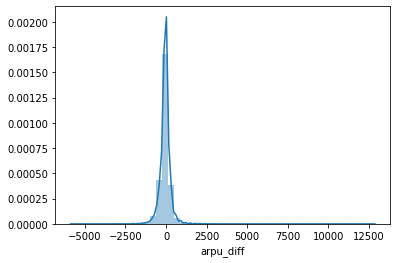

In [58]:
sns.distplot(churn_filtered.arpu_diff)

#### We observe a normal plot for average revenue per user difference (8th - avg(6th and 7th)) with mean zero

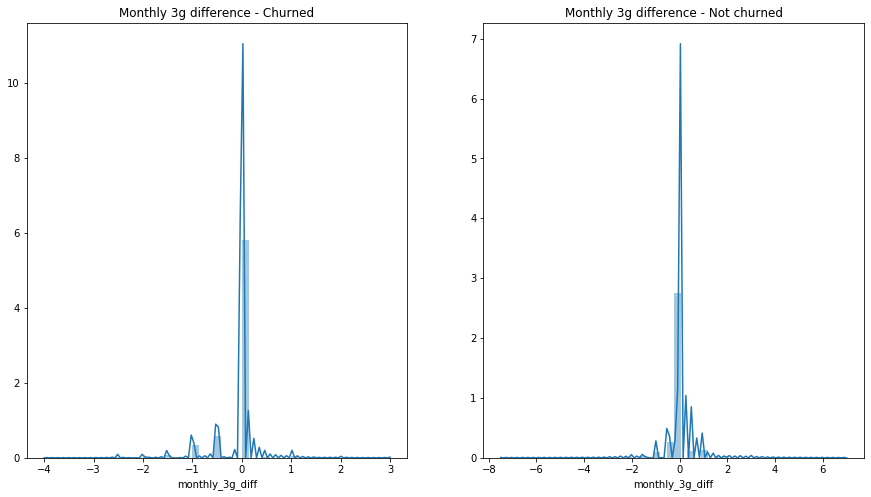

In [286]:
plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
plt.title('Monthly 3g difference - Churned')
sns.distplot(churn_filtered.loc[churn_filtered.churn == 1].monthly_3g_diff, kde = True)
plt.subplot(1,2,2)
plt.title('Monthly 3g difference - Not churned')
sns.distplot(churn_filtered.loc[churn_filtered.churn == 0].monthly_3g_diff, kde = True)

#### For churned users we observe that values <=0 have higher frequency density, where as in non-churn the frequency density is higher on the positive side

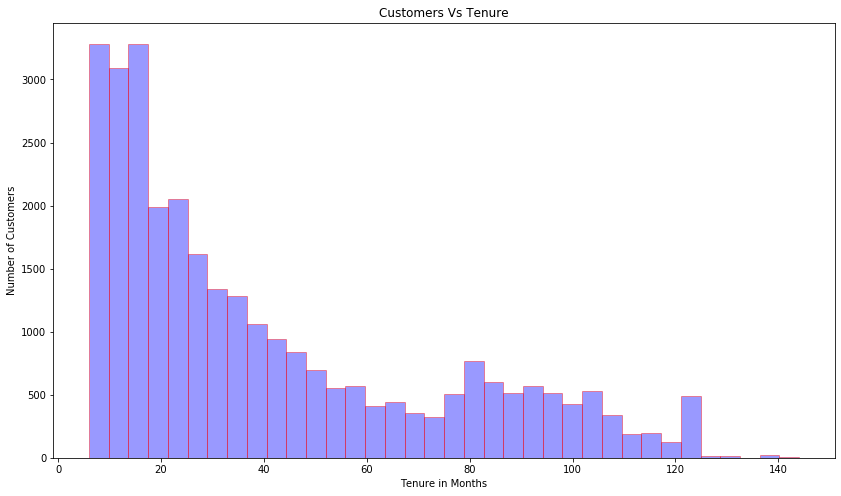

In [60]:
tenure_data = churn_filtered.copy()
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator's network
tenure_data['tenure'] = tenure_data['aon'] / 30
sns.distplot(tenure_data['tenure'], hist = True, kde = False,
             bins = int(180/5), color = 'blue', 
             hist_kws = {'edgecolor':'red'},
             kde_kws = {'linewidth': 4})
plt.ylabel('Number of Customers')
plt.xlabel('Tenure in Months')
plt.title('Customers Vs Tenure')
plt.show()

#### As observed, customers tend to leave the operator service after sometime. The customers are not loyal to the service, maybe because of the schemes or service or network.

In [61]:
#function to observer behavior difference in 6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn_filtered
    plt.subplot(2,3,1)
    plt.title('Month 6', fontsize = 15)
    sns.boxplot(data = df, y = attribute + "_6", x = "churn", hue = "churn",
                showfliers = False, palette= ("plasma"))
    plt.subplot(2,3,2)
    plt.title('Month 7', fontsize = 15)
    sns.boxplot(data = df, y = attribute + "_7", x = "churn", hue = "churn",
                showfliers = False, palette = ("plasma"))
    plt.subplot(2,3,3)
    plt.title('Month 8', fontsize = 15)
    sns.boxplot(data = df, y = attribute + "_8", x = "churn", hue = "churn",
                showfliers = False, palette = ("plasma"))
    plt.show()

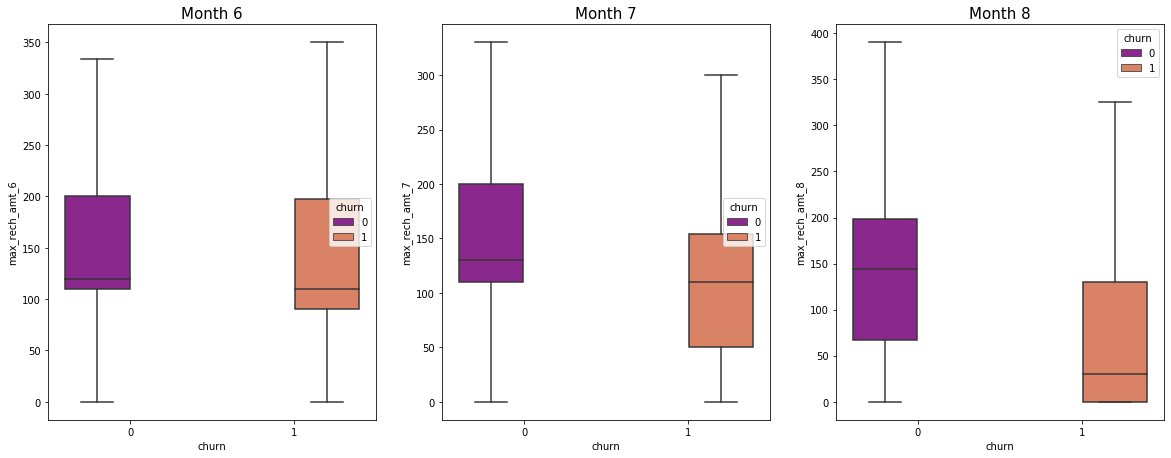

In [62]:
# Recharge amount vs churn
plot_box_chart('max_rech_amt')

#### As observed, the value for max_rech_amt has dropped drastically in the 8th month for customers who have churned. For customers who have not churned, the max_rech_amt remains somewhat constant

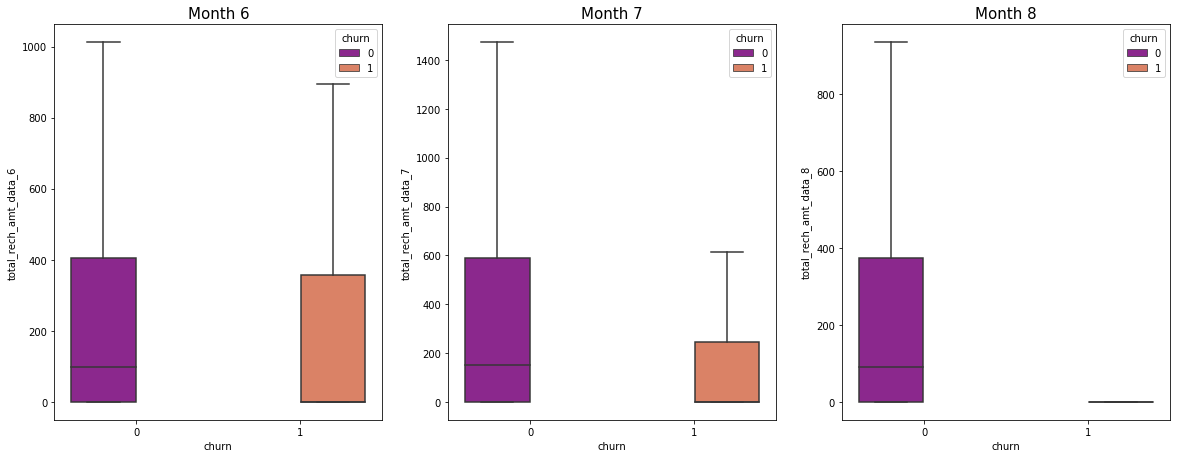

In [63]:
plot_box_chart('total_rech_amt_data')

#### As observed, there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

In [289]:
churn_filtered.columns

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'vol_2g_mb_6',
       'vol_3g_mb_6', 'sachet_2g_6', 'aon', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8', 'churn', 'arpu_diff',
       'onnet_mou_diff', 'monthly_3g_diff', 'roam_ic_mou_diff',
       'roam_og_mou_diff', 'night_pck_user_6_0.0', 'night_pck_user_6_1.0',
       'night_pck_user_7_0.0', 'night_pck_user_7_1.0', 'night_pck_user_8_0.0',
       'night_pck_user_8_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0',
       'fb_user_

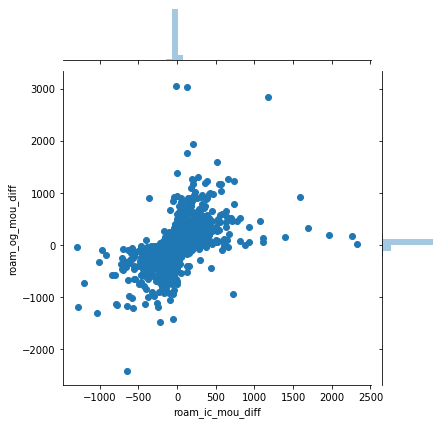

In [288]:
sns.jointplot(x = churn_filtered.roam_ic_mou_diff, y = churn_filtered.roam_og_mou_diff)

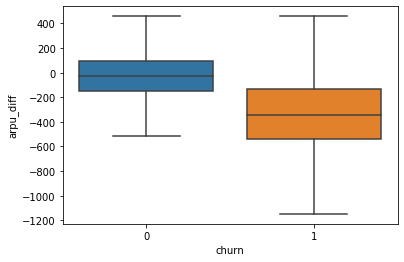

In [65]:
sns.boxplot(x = 'churn', y = 'arpu_diff', data = churn_filtered, showfliers = False)

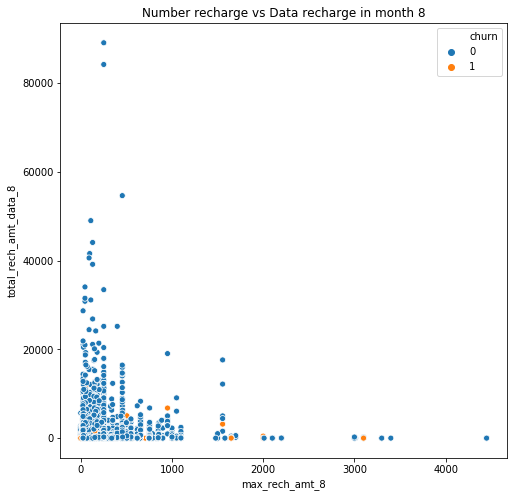

In [66]:
plt.figure(figsize = [8, 8])
plt.title('Number recharge vs Data recharge in month 8')
sns.scatterplot(x = 'max_rech_amt_8', y = 'total_rech_amt_data_8', hue = 'churn', data = churn_filtered)
plt.show()

#### As observed, there are some high-value customers who had high max_rech_amt in months na dstill churned. One possible reason for it can be a better scheme from competetive services. Also, all the churned customers have low total_rech_amt_data

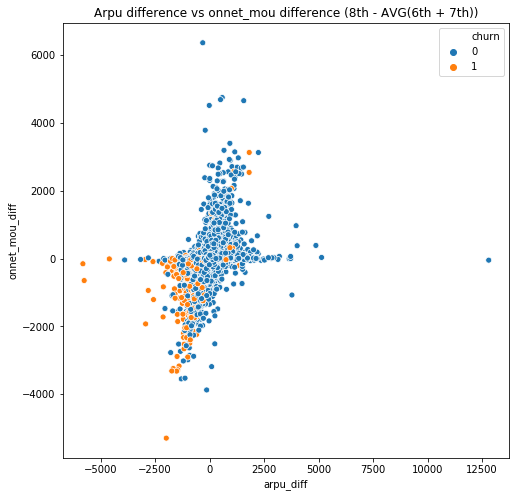

In [67]:
plt.figure(figsize = [8, 8])
plt.title('Arpu difference vs onnet_mou difference (8th - AVG(6th + 7th))')
sns.scatterplot(x = 'arpu_diff', y = 'onnet_mou_diff', hue = 'churn', data = churn_filtered)
plt.show()

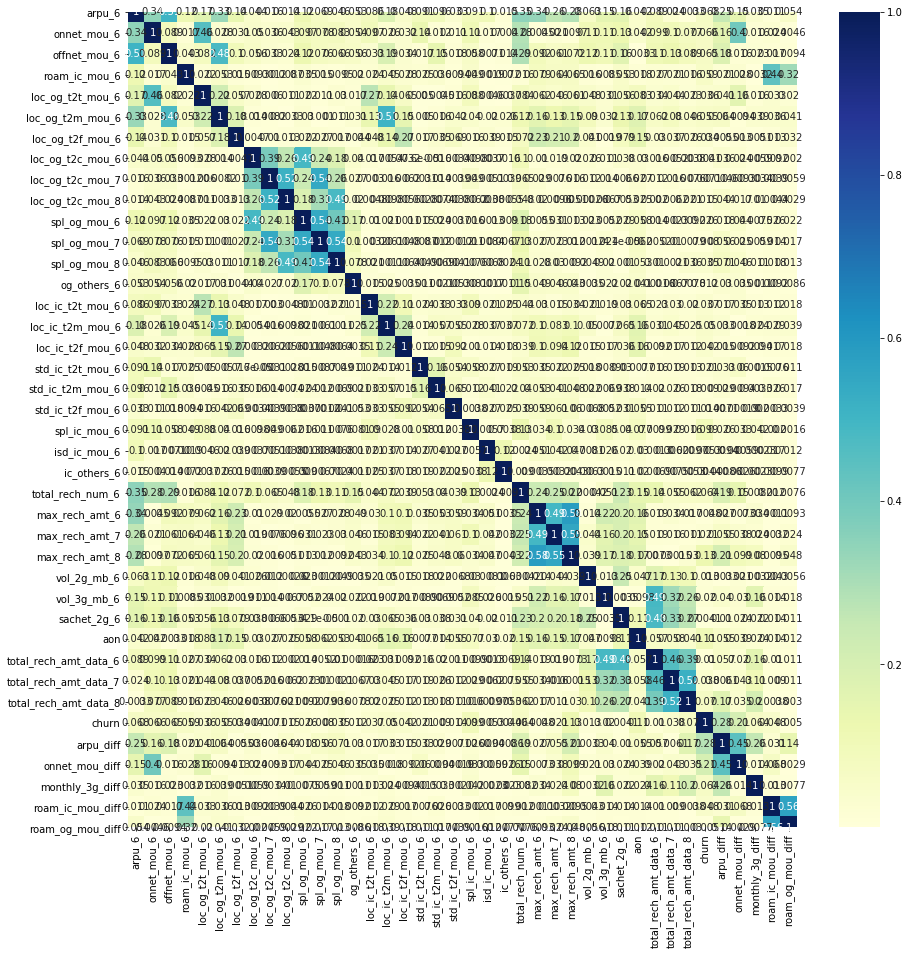

In [69]:
### Correlation matrix
# figure size
plt.figure(figsize=(15,15))
corr_matrix = churn_filtered.corr().abs()
# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

## Treating outliers using IQR

Using IQR methodology to cap outliers

In [70]:
for col in num_cols:
    Q1 = churn_filtered[col].quantile(0.25)
    Q3 = churn_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    if(len(churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] < (Q1 - 1.5 * IQR)]) > 0 
       or len(churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] > (Q3 + 1.5 * IQR)]) > 0):
        print('Found outliers in column: ' + col)
        churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] < (Q1 - 1.5 * IQR)] = Q1 - 1.5 * IQR
        churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] > (Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR
        print('Capped outliers in column "' + col + '" using IQR method' )

Found outliers in column: arpu_6
Capped outliers in column "arpu_6" using IQR method
Found outliers in column: onnet_mou_6
Capped outliers in column "onnet_mou_6" using IQR method
Found outliers in column: roam_ic_mou_6
Capped outliers in column "roam_ic_mou_6" using IQR method


# Modelling

### Dummification of categorical columns

In [71]:
churn_filtered.shape

(29953, 46)

In [72]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVariables = pd.get_dummies(churn_filtered[cat_cols], drop_first=True)

In [73]:
# Adding the results to the master dataframe
churn_filtered = pd.concat([churn_filtered, dummyVariables], axis=1)

In [74]:
churn_filtered.drop(cat_cols, axis=1, inplace=True)

In [75]:
churn_filtered.shape

(29953, 52)

### Train-test split

Splitting the data set in 7:3 ratio for train and test

In [76]:
#Splitting the dataframe to 70% train and 30% test
df_train, df_test = train_test_split(churn_filtered, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(20967, 52)
(8986, 52)


In [77]:
y_train = df_train['churn']
X_train = df_train.drop('churn', axis = 1)

In [78]:
y_test = df_test['churn']
X_test = df_test.drop('churn', axis = 1)

## Scaling

Using a minmax scaler to scale data in train and test set

In [79]:
# scaling 
scaler = MinMaxScaler()
num_cols.remove('churn')
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,sachet_2g_6,aon,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_diff,onnet_mou_diff,monthly_3g_diff,roam_ic_mou_diff,roam_og_mou_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
5067,0.0,0.046544,0.068875,0.113617,0.014134,0.015214,0.062722,0.008474,0.021611,0.053740,0.000000,0.000790,0.010756,0.001525,0.006962,0.026128,0.008806,0.007417,0.008863,0.000000,0.968509,0.0,0.000000,0.019544,0.031920,0.031920,0.032367,0.000000,0.0,0.000000,0.076793,0.000000,0.000000,0.000000,0.308721,0.521394,0.517241,0.246704,0.420507,0,0,0,0,0,0,0,0,0,0,0,0
25362,0.0,0.067703,0.093112,0.013230,0.023423,0.017108,0.005543,0.008474,0.020252,0.030511,0.009656,0.036681,0.000000,0.006199,0.041587,0.010490,0.001764,0.015997,0.019893,0.033535,0.968942,0.0,0.000298,0.039088,0.027431,0.012469,0.006743,0.000000,0.0,0.000000,0.002173,0.000000,0.000000,0.000000,0.288899,0.506116,0.517241,0.359246,0.556100,0,0,0,0,0,0,0,0,0,0,0,0
10076,0.0,0.018164,0.004294,0.013230,0.012403,0.007683,0.000000,0.008474,0.019891,0.030511,0.000000,0.000000,0.000013,0.000000,0.017663,0.011255,0.002765,0.006043,0.000000,0.000000,0.968509,0.0,0.000417,0.048860,0.004988,0.004239,0.006743,0.026318,0.0,0.214286,0.170249,0.012523,0.015123,0.007014,0.313191,0.527806,0.517241,0.357573,0.554648,1,0,1,0,1,0,0,1,0,1,0,1
7679,0.0,0.221833,0.047336,0.013230,0.040377,0.090530,0.000000,0.008474,0.019891,0.030511,0.001446,0.000814,0.002284,0.000000,0.021078,0.052236,0.013131,0.007410,0.005725,0.000000,0.968509,0.0,0.000000,0.065147,0.049875,0.049875,0.056192,0.000000,0.0,0.000000,0.023907,0.000000,0.000000,0.000000,0.309777,0.523156,0.517241,0.357573,0.554648,0,0,0,0,0,0,0,0,0,0,0,0
14966,0.0,0.020797,0.013618,0.013230,0.015959,0.012938,0.005248,0.008474,0.020923,0.046355,0.010858,0.011210,0.048713,0.000000,0.007120,0.006048,0.000179,0.007927,0.002965,0.014351,0.968509,0.0,0.000000,0.019544,0.013466,0.010224,0.009216,0.142923,0.0,0.000000,0.114465,0.005831,0.011184,0.001728,0.316322,0.528483,0.517241,0.357573,0.554648,1,0,1,0,1,0,0,1,0,1,0,1


## Logistic Regression Model using RFE

In [80]:
# using sklearn 
logreg = LogisticRegression(class_weight='balanced')

In [81]:
X_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,sachet_2g_6,aon,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_diff,onnet_mou_diff,monthly_3g_diff,roam_ic_mou_diff,roam_og_mou_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
count,20967.0,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000,20967.000000
mean,0.0,0.052250,0.045101,0.019699,0.028128,0.040273,0.009550,0.014399,0.023003,0.035428,0.005784,0.005671,0.008595,0.001110,0.016726,0.032533,0.009272,0.010803,0.006334,0.002028,0.951595,0.002788,0.000842,0.038511,0.042331,0.042848,0.035936,0.012181,0.012954,0.025295,0.249537,0.004374,0.009581,0.005258,0.309392,0.523986,0.516472,0.357328,0.553846,0.546669,0.014547,0.557209,0.013020,0.520866,0.011876,0.040921,0.520294,0.043831,0.526399,0.053417,0.479325
std,0.0,0.060748,0.058235,0.030362,0.042692,0.060228,0.030612,0.023540,0.017176,0.020737,0.017596,0.018061,0.026037,0.007678,0.024854,0.047266,0.027885,0.024471,0.021554,0.013928,0.130162,0.017036,0.010770,0.030665,0.044070,0.045231,0.038361,0.032161,0.032949,0.059577,0.231827,0.014262,0.025855,0.017975,0.018439,0.030521,0.033481,0.018244,0.021128,0.497829,0.119732,0.496728,0.113365,0.499576,0.108330,0.198113,0.499600,0.204723,0.499315,0.224869,0.499584
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.020271,0.009613,0.013230,0.013213,0.005292,0.000000,0.008474,0.019891,0.030511,0.000000,0.000000,0.000000,0.000000,0.007795,0.006621,0.000000,0.006043,0.000000,0.000000,0.968509,0.000000,0.000000,0.019544,0.027431,0.027431,0.011238,0.000000,0.000000,0.000000,0.067617,0.000000,0.000000,0.000000,0.302391,0.521357,0.517241,0.357573,0.554648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.029330,0.026513,0.013230,0.017044,0.020378,0.000370,0.008474,0.019891,0.030511,0.000391,0.000711,0.001097,0.000000,0.010724,0.018969,0.001287,0.006170,0.001227,0.000000,0.968509,0.000000,0.000000,0.029316,0.029925,0.031920,0.029220,0.000002,0.000000,0.000000,0.161797,0.000928,0.002269,0.000281,0.309902,0.526897,0.517241,0.357573,0.554648,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.0,0.056560,0.058005,0.013230,0.027310,0.051335,0.006223,0.008949,0.020029,0.031671,0.005014,0.005443,0.007732,0.000000,0.017365,0.040297,0.007215,0.008738,0.005103,0.000229,0.968509,0.000000,0.000067,0.048860,0.049875,0.049875,0.044504,0.008098,0

In [82]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
## list columns that rfe predicted as useful
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 37),
 ('onnet_mou_6', False, 3),
 ('offnet_mou_6', False, 9),
 ('roam_ic_mou_6', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2c_mou_6', False, 27),
 ('loc_og_t2c_mou_7', False, 28),
 ('loc_og_t2c_mou_8', False, 11),
 ('spl_og_mou_6', False, 10),
 ('spl_og_mou_7', False, 25),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 20),
 ('loc_ic_t2t_mou_6', True, 1),
 ('loc_ic_t2m_mou_6', False, 13),
 ('loc_ic_t2f_mou_6', True, 1),
 ('std_ic_t2t_mou_6', False, 12),
 ('std_ic_t2m_mou_6', False, 14),
 ('std_ic_t2f_mou_6', False, 19),
 ('spl_ic_mou_6', False, 2),
 ('isd_ic_mou_6', False, 7),
 ('ic_others_6', False, 18),
 ('total_rech_num_6', False, 23),
 ('max_rech_amt_6', True, 1),
 ('max_rech_amt_7', False, 17),
 ('max_rech_amt_8', True, 1),
 ('vol_2g_mb_6', False, 4),
 ('vol_3g_mb_6', False, 30),
 ('sachet_2g_6', False, 5),
 ('aon', False, 8),
 ('total_rech_amt_data_6', False, 26),
 ('total_rech_amt_

In [84]:
# get supported columns from RFE
col = X_train.columns[rfe.support_]
col

Index(['roam_ic_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'spl_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2f_mou_6', 'max_rech_amt_6', 'max_rech_amt_8',
       'total_rech_amt_data_8', 'arpu_diff', 'onnet_mou_diff',
       'monthly_3g_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff'],
      dtype='object')

### Assessing the model with StatsModels

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4690.6
Date:                Sat, 29 Aug 2020   Deviance:                       9381.2
Time:                        13:22:23   Pearson chi2:                 6.05e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2405      0.995      8.286      0.000       6.291      10.190
roam_ic_mou_6             7.9681      0.877      9.088      0.000       6.250       9.686
loc_og_t2t_mou_6         -4.9139      1.130     -4.347      0.000      -7.129      -2.698
loc_og_t2m_mou_6         -4.4841      0.640     -7.008      0.000      -5.738      -3.230
loc_og_t2f_mou_6         -4.5894      1.719     -2.670      0.008      -7.959      -1.220
spl_og_mou_8             -4.9610      1.845     -2.689      0.007      -8.577      -1.345
loc_ic_t2t_mou_6         -7.2042      2.328     -3.095      0.002     -11.767      -2.642
loc_ic_t2f_mou_6         -2.6411      1.736     -1.522      0.128      -6.043       0.761
max_rech_amt_6            2.6340      0.743      3.547      0.000       1.179       4.089
max_rech_amt_8          -18.3758      1.411    -13.025      0.000     -21.141     -15.611
total_rech_amt_data_8   -94.3630      9.619     -9.811      0.000    -113.215     -75.511
arpu_diff               -51.6859      2.188    -23.618      0.000     -55.975     -47.397
onnet_mou_diff           -3.8109      0.968     -3.936      0.000      -5.708      -1.913
monthly_3g_diff           1.5902      1.036      1.536      0.125      -0.440       3.620
roam_ic_mou_diff         11.9491      1.629      7.335      0.000       8.756      15.142
roam_og_mou_diff          5.0351      1.407      3.577      0.000       2.277       7.794
=========================================================================================
"""

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,roam_og_mou_diff,807.42
13,roam_ic_mou_diff,588.75
10,arpu_diff,425.97
11,onnet_mou_diff,334.24
12,monthly_3g_diff,232.46
8,max_rech_amt_8,3.12
7,max_rech_amt_6,3.10
1,loc_og_t2t_mou_6,1.66
2,loc_og_t2m_mou_6,1.65
0,roam_ic_mou_6,1.64


In [87]:
### drop vol_3g_mb_diff since this has p value greater than expected
col = col.drop('loc_og_t2f_mou_6')
col

Index(['roam_ic_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'spl_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_6', 'max_rech_amt_6',
       'max_rech_amt_8', 'total_rech_amt_data_8', 'arpu_diff',
       'onnet_mou_diff', 'monthly_3g_diff', 'roam_ic_mou_diff',
       'roam_og_mou_diff'],
      dtype='object')

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4695.0
Date:                Sat, 29 Aug 2020   Deviance:                       9390.0
Time:                        13:22:36   Pearson chi2:                 5.81e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.2835      0.996      8.316      0.000       6.331      10.236
roam_ic_mou_6             8.0158      0.880      9.107      0.000       6.291       9.741
loc_og_t2t_mou_6         -4.9801      1.143     -4.356      0.000      -7.221      -2.739
loc_og_t2m_mou_6         -4.7155      0.645     -7.306      0.000      -5.980      -3.450
spl_og_mou_8             -4.9421      1.843     -2.682      0.007      -8.553      -1.331
loc_ic_t2t_mou_6         -7.2387      2.343     -3.089      0.002     -11.831      -2.646
loc_ic_t2f_mou_6         -3.9514      1.785     -2.214      0.027      -7.450      -0.453
max_rech_amt_6            2.2934      0.736      3.117      0.002       0.851       3.736
max_rech_amt_8          -18.6468      1.423    -13.103      0.000     -21.436     -15.858
total_rech_amt_data_8   -93.8446      9.597     -9.778      0.000    -112.655     -75.034
arpu_diff               -51.4022      2.189    -23.479      0.000     -55.693     -47.111
onnet_mou_diff           -3.9480      0.968     -4.079      0.000      -5.845      -2.051
monthly_3g_diff           1.5397      1.036      1.487      0.137      -0.490       3.569
roam_ic_mou_diff         11.9565      1.635      7.313      0.000       8.752      15.161
roam_og_mou_diff          4.9852      1.411      3.534      0.000       2.220       7.750
=========================================================================================
"""

In [89]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,roam_og_mou_diff,807.35
12,roam_ic_mou_diff,588.63
9,arpu_diff,425.97
10,onnet_mou_diff,334.23
11,monthly_3g_diff,232.46
7,max_rech_amt_8,3.11
6,max_rech_amt_6,3.04
1,loc_og_t2t_mou_6,1.66
0,roam_ic_mou_6,1.64
2,loc_og_t2m_mou_6,1.63


In [90]:
### drop total_rech_amt_data_7 since this has p value greater than expected
col = col.drop('monthly_3g_diff', 1)

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4696.1
Date:                Sat, 29 Aug 2020   Deviance:                       9392.2
Time:                        13:22:49   Pearson chi2:                 5.95e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.0169      0.865     10.420      0.000       7.321      10.713
roam_ic_mou_6             8.0436      0.878      9.158      0.000       6.322       9.765
loc_og_t2t_mou_6         -4.9743      1.138     -4.373      0.000      -7.204      -2.745
loc_og_t2m_mou_6         -4.6400      0.643     -7.219      0.000      -5.900      -3.380
spl_og_mou_8             -4.9726      1.845     -2.695      0.007      -8.589      -1.356
loc_ic_t2t_mou_6         -7.1437      2.331     -3.065      0.002     -11.712      -2.575
loc_ic_t2f_mou_6         -3.9367      1.784     -2.206      0.027      -7.434      -0.440
max_rech_amt_6            2.1446      0.734      2.921      0.003       0.706       3.584
max_rech_amt_8          -18.6306      1.432    -13.012      0.000     -21.437     -15.824
total_rech_amt_data_8   -93.9058      9.623     -9.758      0.000    -112.767     -75.045
arpu_diff               -50.5687      2.118    -23.875      0.000     -54.720     -46.417
onnet_mou_diff           -4.2090      0.953     -4.418      0.000      -6.076      -2.342
roam_ic_mou_diff         11.9952      1.631      7.353      0.000       8.798      15.192
roam_og_mou_diff          4.8487      1.408      3.444      0.001       2.089       7.608
=========================================================================================
"""

In [92]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,roam_og_mou_diff,782.28
11,roam_ic_mou_diff,579.09
9,arpu_diff,387.63
10,onnet_mou_diff,333.69
7,max_rech_amt_8,3.11
6,max_rech_amt_6,3.04
1,loc_og_t2t_mou_6,1.66
2,loc_og_t2m_mou_6,1.62
0,roam_ic_mou_6,1.60
4,loc_ic_t2t_mou_6,1.60


In [93]:
# drop loc_og_t2m_mou_diff as it has high p value
col = col.drop('loc_ic_t2f_mou_6')

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4699.1
Date:                Sat, 29 Aug 2020   Deviance:                       9398.2
Time:                        13:23:15   Pearson chi2:                 6.14e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.0832      0.867     10.474      0.000       7.384      10.783
roam_ic_mou_6             8.0792      0.878      9.201      0.000       6.358       9.800
loc_og_t2t_mou_6         -5.0073      1.142     -4.385      0.000      -7.245      -2.769
loc_og_t2m_mou_6         -4.8383      0.644     -7.513      0.000      -6.100      -3.576
spl_og_mou_8             -4.9290      1.842     -2.676      0.007      -8.539      -1.319
loc_ic_t2t_mou_6         -7.7247      2.355     -3.280      0.001     -12.341      -3.108
max_rech_amt_6            2.0334      0.734      2.770      0.006       0.594       3.472
max_rech_amt_8          -18.7845      1.431    -13.126      0.000     -21.589     -15.980
total_rech_amt_data_8   -94.3358      9.637     -9.789      0.000    -113.224     -75.448
arpu_diff               -50.7077      2.118    -23.942      0.000     -54.859     -46.557
onnet_mou_diff           -4.2691      0.953     -4.479      0.000      -6.137      -2.401
roam_ic_mou_diff         12.0206      1.637      7.345      0.000       8.813      15.228
roam_og_mou_diff          4.8385      1.412      3.427      0.001       2.071       7.606
=========================================================================================
"""

In [95]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,roam_og_mou_diff,782.28
10,roam_ic_mou_diff,579.08
8,arpu_diff,387.62
9,onnet_mou_diff,333.69
6,max_rech_amt_8,3.09
5,max_rech_amt_6,3.03
1,loc_og_t2t_mou_6,1.66
2,loc_og_t2m_mou_6,1.60
0,roam_ic_mou_6,1.59
4,loc_ic_t2t_mou_6,1.58


In [96]:
# drop loc_og_t2m_mou_diff as it has high p value
col = col.drop('roam_og_mou_diff')

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20955
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4704.9
Date:                Sat, 29 Aug 2020   Deviance:                       9409.7
Time:                        13:23:21   Pearson chi2:                 5.99e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5264      0.773     13.617      0.000       9.011      12.042
roam_ic_mou_6             7.6969      0.874      8.805      0.000       5.984       9.410
loc_og_t2t_mou_6         -5.2215      1.116     -4.677      0.000      -7.410      -3.033
loc_og_t2m_mou_6         -4.6879      0.640     -7.325      0.000      -5.942      -3.434
spl_og_mou_8             -5.0542      1.850     -2.731      0.006      -8.681      -1.427
loc_ic_t2t_mou_6         -7.4492      2.326     -3.203      0.001     -12.008      -2.891
max_rech_amt_6            2.0474      0.732      2.797      0.005       0.613       3.482
max_rech_amt_8          -18.7328      1.433    -13.069      0.000     -21.542     -15.923
total_rech_amt_data_8   -94.5407      9.629     -9.818      0.000    -113.413     -75.668
arpu_diff               -49.3917      2.079    -23.756      0.000     -53.467     -45.317
onnet_mou_diff           -4.5065      0.951     -4.737      0.000      -6.371      -2.642
roam_ic_mou_diff         14.7173      1.449     10.159      0.000      11.878      17.557
=========================================================================================
"""

In [98]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,arpu_diff,354.58
9,onnet_mou_diff,322.90
10,roam_ic_mou_diff,222.75
6,max_rech_amt_8,3.07
5,max_rech_amt_6,3.03
1,loc_og_t2t_mou_6,1.66
2,loc_og_t2m_mou_6,1.60
0,roam_ic_mou_6,1.58
4,loc_ic_t2t_mou_6,1.58
3,spl_og_mou_8,1.12


In [99]:
# drop loc_og_t2m_mou_diff as it has high p value
col = col.drop('spl_og_mou_8')

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20956
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4710.0
Date:                Sat, 29 Aug 2020   Deviance:                       9419.9
Time:                        13:23:23   Pearson chi2:                 5.94e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.4766      0.772     13.572      0.000       8.964      11.990
roam_ic_mou_6             7.7555      0.873      8.880      0.000       6.044       9.467
loc_og_t2t_mou_6         -5.2547      1.118     -4.699      0.000      -7.446      -3.063
loc_og_t2m_mou_6         -4.7150      0.640     -7.369      0.000      -5.969      -3.461
loc_ic_t2t_mou_6         -7.4321      2.322     -3.201      0.001     -11.982      -2.882
max_rech_amt_6            2.1485      0.729      2.947      0.003       0.720       3.577
max_rech_amt_8          -18.8149      1.434    -13.125      0.000     -21.625     -16.005
total_rech_amt_data_8   -94.2685      9.606     -9.814      0.000    -113.096     -75.441
arpu_diff               -49.6824      2.072    -23.980      0.000     -53.743     -45.622
onnet_mou_diff           -4.4175      0.948     -4.661      0.000      -6.275      -2.560
roam_ic_mou_diff         14.8701      1.450     10.254      0.000      12.028      17.712
=========================================================================================
"""

In [101]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,arpu_diff,353.65
8,onnet_mou_diff,322.85
9,roam_ic_mou_diff,222.05
5,max_rech_amt_8,3.07
4,max_rech_amt_6,3.03
1,loc_og_t2t_mou_6,1.66
2,loc_og_t2m_mou_6,1.60
0,roam_ic_mou_6,1.58
3,loc_ic_t2t_mou_6,1.58
6,total_rech_amt_data_8,1.12


In [102]:
# drop loc_og_t2m_mou_diff as it has high p value
col = col.drop('arpu_diff')

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20957
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5027.1
Date:                Sat, 29 Aug 2020   Deviance:                       10054.
Time:                        13:23:29   Pearson chi2:                 4.49e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.2801      0.669      3.409      0.001       0.969       3.591
roam_ic_mou_6             8.7942      0.823     10.680      0.000       7.180      10.408
loc_og_t2t_mou_6         -6.6180      1.079     -6.135      0.000      -8.732      -4.504
loc_og_t2m_mou_6         -2.3008      0.607     -3.794      0.000      -3.490      -1.112
loc_ic_t2t_mou_6         -5.8760      2.122     -2.769      0.006     -10.035      -1.717
max_rech_amt_6            4.5203      0.596      7.584      0.000       3.352       5.689
max_rech_amt_8          -27.9288      1.515    -18.440      0.000     -30.897     -24.960
total_rech_amt_data_8  -117.4217     10.070    -11.660      0.000    -137.159     -97.684
onnet_mou_diff          -16.4036      0.821    -19.980      0.000     -18.013     -14.794
roam_ic_mou_diff         13.3224      1.386      9.611      0.000      10.606      16.039
=========================================================================================
"""

In [104]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,onnet_mou_diff,181.30
8,roam_ic_mou_diff,177.51
4,max_rech_amt_6,2.98
5,max_rech_amt_8,2.93
1,loc_og_t2t_mou_6,1.64
2,loc_og_t2m_mou_6,1.58
3,loc_ic_t2t_mou_6,1.58
0,roam_ic_mou_6,1.57
6,total_rech_amt_data_8,1.09


In [105]:
# drop loc_og_t2m_mou_diff as it has high p value
col = col.drop('onnet_mou_diff')

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20958
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5251.9
Date:                Sat, 29 Aug 2020   Deviance:                       10504.
Time:                        13:23:32   Pearson chi2:                 4.63e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.6995      0.501    -13.363      0.000      -7.682      -5.717
roam_ic_mou_6             9.1690      0.816     11.242      0.000       7.570      10.768
loc_og_t2t_mou_6         -3.1557      1.055     -2.990      0.003      -5.224      -1.087
loc_og_t2m_mou_6         -3.0411      0.610     -4.983      0.000      -4.237      -1.845
loc_ic_t2t_mou_6         -5.7537      2.030     -2.834      0.005      -9.732      -1.775
max_rech_amt_6            4.3448      0.600      7.240      0.000       3.169       5.521
max_rech_amt_8          -33.8553      1.537    -22.026      0.000     -36.868     -30.843
total_rech_amt_data_8  -136.8682     10.473    -13.069      0.000    -157.395    -116.341
roam_ic_mou_diff         15.0157      1.381     10.873      0.000      12.309      17.722
=========================================================================================
"""

In [107]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,roam_ic_mou_diff,3.21
4,max_rech_amt_6,2.97
5,max_rech_amt_8,2.91
1,loc_og_t2t_mou_6,1.61
2,loc_og_t2m_mou_6,1.58
3,loc_ic_t2t_mou_6,1.58
0,roam_ic_mou_6,1.40
6,total_rech_amt_data_8,1.09


In [108]:
# drop loc_og_t2m_mou_diff as it has high p value
col = col.drop('loc_ic_t2t_mou_6')

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20959
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5257.4
Date:                Sat, 29 Aug 2020   Deviance:                       10515.
Time:                        13:23:37   Pearson chi2:                 4.92e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.8036      0.495    -13.752      0.000      -7.773      -5.834
roam_ic_mou_6             9.2367      0.815     11.338      0.000       7.640      10.833
loc_og_t2t_mou_6         -4.2210      1.032     -4.090      0.000      -6.243      -2.198
loc_og_t2m_mou_6         -3.2731      0.613     -5.340      0.000      -4.474      -2.072
max_rech_amt_6            4.3601      0.601      7.251      0.000       3.182       5.539
max_rech_amt_8          -34.0639      1.537    -22.159      0.000     -37.077     -31.051
total_rech_amt_data_8  -137.0510     10.490    -13.065      0.000    -157.612    -116.490
roam_ic_mou_diff         15.1716      1.367     11.102      0.000      12.493      17.850
=========================================================================================
"""

In [110]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,roam_ic_mou_diff,3.00
3,max_rech_amt_6,2.97
4,max_rech_amt_8,2.91
2,loc_og_t2m_mou_6,1.57
1,loc_og_t2t_mou_6,1.51
0,roam_ic_mou_6,1.40
5,total_rech_amt_data_8,1.09


In [111]:
finalCols = X_train[col].columns
X_test_log = X_test[finalCols]
X_test_log.head()

,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,max_rech_amt_6,max_rech_amt_8,total_rech_amt_data_8,roam_ic_mou_diff
14483,0.276692,0.012403,0.000000,0.261845,0.236008,0.000000,0.241369
8922,0.013230,0.013202,0.078266,0.049875,0.062711,0.002009,0.357573
15014,0.016507,0.017281,0.005968,0.007481,0.011238,0.010100,0.358096
19846,0.013230,0.013259,0.020306,0.016958,0.011238,0.000258,0.357573
27504,0.013230,0.217655,0.116541,0.027431,0.029220,0.000000,0.357573


In [112]:
# using sklearn
logregfinal = LogisticRegression(class_weight='balanced')

In [113]:
logregfinal.fit(X_train[finalCols], y_train)
y_test_pred = logregfinal.predict(X_test_log)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

#### Evaluation of model on train data

In [243]:
y_train_lr_pred = logregfinal.predict(X_train[finalCols])

In [245]:
# create onfusion matrix
y_train_lr_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_lr_pred})
y_train_lr_pred_final['LeadNumber'] = y_train.index

y_train_lr_pred_final['predicted'] = y_train_lr_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_lr_pred_final.head()

# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_lr_pred_final.Converted, y_train_lr_pred_final.predicted), 2)

0.71

#### Evaluation of model on test data

In [246]:
# create onfusion matrix
y_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_pred_final['LeadNumber'] = y_test.index


y_pred_final['predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted), 2)

0.72

#### We observe 71% accuracy on train data and 72% accuracy on test data at 0.35 probability cut off. Hence, we move forward for calculating the sensitivity of the model

In [115]:
confusion_log = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )

In [116]:
TP = confusion_log[1,1] # true positive 
TN = confusion_log[0,0] # true negatives
FP = confusion_log[0,1] # false positives
FN = confusion_log[1,0] # false negatives

In [117]:
# Let's see the sensitivity/recall of our logistic regression model
recall_score(y_pred_final.Converted, y_pred_final.predicted)

0.7121879588839941

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.7192052980132451

In [119]:
#precision
precision_score(y_pred_final.Converted, y_pred_final.predicted)

0.172168974085907

In [120]:
# f1 score
f1_score(y_pred_final.Converted, y_pred_final.predicted)

0.2773013150371641

## PCA

In [121]:
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [122]:
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

0      60.83
1      71.65
2      79.76
3      86.94
4      90.01
5      92.53
6      94.35
7      96.05
8      97.00
9      97.56
10     97.97
11     98.30
12     98.53
13     98.76
14     98.90
15     99.03
16     99.11
17     99.18
18     99.25
19     99.31
20     99.37
21     99.43
22     99.49
23     99.54
24     99.58
25     99.62
26     99.66
27     99.69
28     99.73
29     99.76
30     99.79
31     99.81
32     99.84
33     99.86
34     99.89
35     99.91
36     99.92
37     99.94
38     99.95
39     99.96
40     99.97
41     99.97
42     99.98
43     99.99
44     99.99
45    100.00
46    100.00
47    100.00
48    100.00
49    100.00
50    100.00
dtype: float64

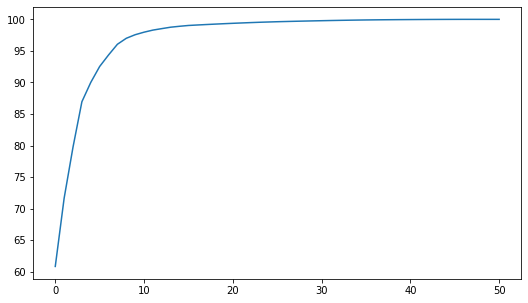

In [123]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

Looking at the explained variance ratio for each component

In [124]:
pca.explained_variance_ratio_

array([6.08283482e-01, 1.08236524e-01, 8.10407037e-02, 7.18561953e-02,
       3.06339198e-02, 2.52151356e-02, 1.82581614e-02, 1.69783394e-02,
       9.48797290e-03, 5.65475910e-03, 4.01528365e-03, 3.31781949e-03,
       2.32682298e-03, 2.26189972e-03, 1.45219112e-03, 1.27818873e-03,
       7.54263507e-04, 7.21009972e-04, 6.81638913e-04, 6.54506341e-04,
       6.18013305e-04, 5.67836917e-04, 5.56561197e-04, 5.18583086e-04,
       4.41681454e-04, 4.31725233e-04, 3.53145722e-04, 3.44204119e-04,
       3.15593521e-04, 3.07376236e-04, 2.91061855e-04, 2.83154610e-04,
       2.60109962e-04, 2.36021564e-04, 2.23042452e-04, 1.94187377e-04,
       1.62082746e-04, 1.42606422e-04, 1.11277045e-04, 1.06443964e-04,
       8.73057393e-05, 8.33921375e-05, 7.12975342e-05, 6.42311586e-05,
       5.27005324e-05, 3.65954154e-05, 3.09509236e-05, 1.19966809e-31,
       1.95649730e-32, 1.32862296e-32, 5.73974351e-33])

#### Making a scree plot for the explained variance

In [125]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.60828348, 0.71652001, 0.79756071, 0.86941691, 0.90005082,
       0.92526596, 0.94352412, 0.96050246, 0.96999043, 0.97564519,
       0.97966048, 0.9829783 , 0.98530512, 0.98756702, 0.98901921,
       0.9902974 , 0.99105166, 0.99177267, 0.99245431, 0.99310882,
       0.99372683, 0.99429467, 0.99485123, 0.99536981, 0.99581149,
       0.99624322, 0.99659636, 0.99694057, 0.99725616, 0.99756354,
       0.9978546 , 0.99813776, 0.99839786, 0.99863389, 0.99885693,
       0.99905112, 0.9992132 , 0.99935581, 0.99946708, 0.99957353,
       0.99966083, 0.99974422, 0.99981552, 0.99987975, 0.99993245,
       0.99996905, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

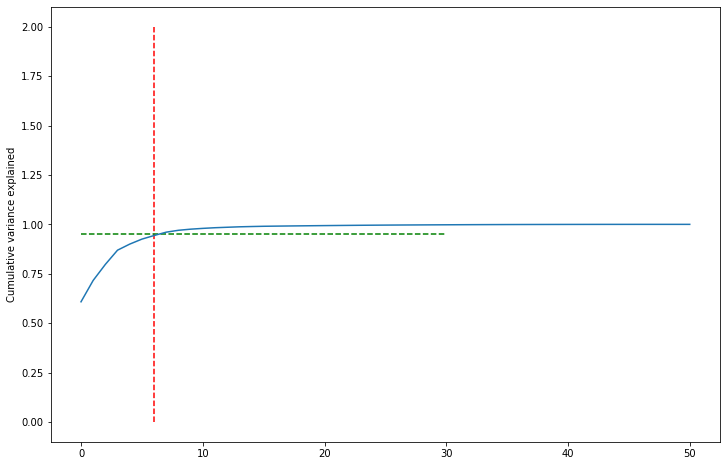

In [292]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=6, ymax=2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [127]:
pca_final = PCA(0.99, svd_solver='full')

In [128]:
df_train_pca = pca_final.fit_transform(X_train)

In [129]:
df_train_pca.shape

(20967, 16)

In [130]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [131]:
corrmat.shape

(16, 16)

Plotting the heatmap of the corr matrix

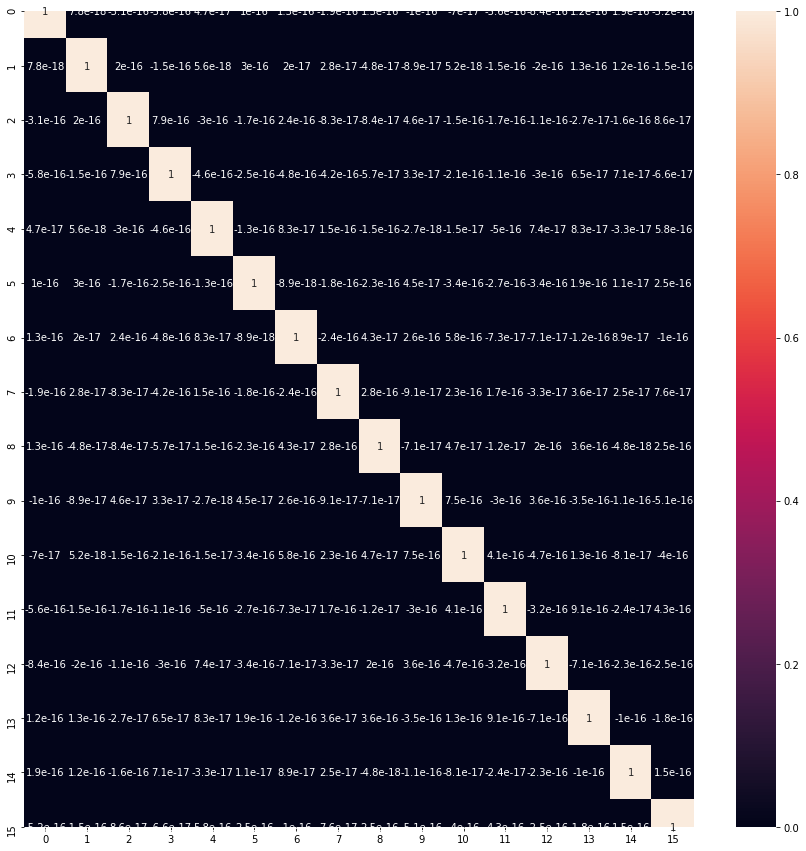

In [132]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [133]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 16)

Looking at the explained variance ratio for each component

## Hyperparameter tuning - PCA and Logistic Regression

In [134]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# hyperparameter space
params = {'C': [0.08, 0.09, 0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [135]:
# fit model
model.fit(df_train_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.08, 0.09, 0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [136]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110349,0.050073,0.000000,0.000000,0.08,l1,"{'C': 0.08, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.227605,0.031400,0.008656,0.002622,0.08,l2,"{'C': 0.08, 'penalty': 'l2'}",0.790560,0.764706,0.785908,0.756839,0.800587,0.779720,0.016372,2
2,0.018076,0.002953,0.000000,0.000000,0.09,l1,"{'C': 0.09, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.188591,0.014424,0.009189,0.002731,0.09,l2,"{'C': 0.09, 'penalty': 'l2'}",0.787611,0.767380,0.785908,0.756839,0.797654,0.779078,0.014805,3
4,0.018535,0.003580,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
5,0.194229,0.014252,0.006250,0.001051,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.784661,0.772727,0.788618,0.756839,0.797654,0.780100,0.014120,1
6,0.017636,0.002461,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
7,0.226763,0.010565,0.007232,0.001191,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.784661,0.764706,0.783198,0.750760,0.791789,0.775023,0.015073,6
8,0.016741,0.003531,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
9,0.274490,0.027861,0.009562,0.004645,1,l2,"{'C': 1, 'penalty': 'l2'}",0.784661,0.767380,0.783198,0.747720,0.785924,0.773776,0.014660,10


In [137]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)
print(model.best_estimator_)

Best AUC:  0.7800997581174288
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight='balanced')


#### Evaluation on train data

In [247]:
# predict churn on train data
y_pred_train = model.predict(df_train_pca)

In [248]:
# check area under curve
y_pred_prob_train = model.predict_proba(df_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob_train),2))

AUC:    	 0.78


In [249]:
# create onfusion matrix
confusion = confusion_matrix(y_train, y_pred_train)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.78


#### Evaluation on test data

In [138]:
# predict churn on test data
y_pred = model.predict(df_test_pca)

In [250]:
# check area under curve
y_pred_prob = model.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.8


#### We observe 78% AUC on train data and 80% AUC on test data. Hence, this model is acceptable. We can move forward with calculating the sensitivity of the model

In [139]:
# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[5345, 2960],
       [ 137,  544]])

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.8


In [142]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity: \t", round(specificity, 2))

Specificity: 	 0.64


#### With Logistic regression + PCA, we have attained a sensitivity of 81%. Let's now build a decision tree with PCA to see if we can do better

## Decision Tree Classifier with PCA and hyperparameter tuning

In [144]:
dsTree = DecisionTreeClassifier(class_weight = 'balanced')
dsTreeParams = {
            'max_depth': [10, 20, 25, 28, 30, 35, 40],
            'min_samples_leaf': [50, 100, 200, 250, 300]}

dsFolds = KFold(n_splits = 5, random_state = 42)

dsTreeModel = GridSearchCV(estimator = dsTree, cv = dsFolds, param_grid = dsTreeParams, scoring='recall', 
                           verbose = 1, n_jobs = -1)

In [145]:
# fit model
dsTreeModel.fit(df_train_pca, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   23.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25, 28, 30, 35, 40],
                         'min_samples_leaf': [50, 100, 200, 250, 300]},
             scoring='recall', verbose=1)

In [146]:
# print best hyperparameters
print("Best AUC: ", dsTreeModel.best_score_)
print("Best hyperparameters: ", dsTreeModel.best_params_)

Best AUC:  0.7314846422255681
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 250}


#### Evaluation on train data

In [251]:
dsTreeTrainPred = dsTreeModel.predict(df_train_pca)

In [253]:
# create onfusion matrix
dsTreeTrainconfusion = confusion_matrix(y_train, dsTreeTrainPred)

In [254]:
TP_ds = dsTreeTrainconfusion[1,1] # true positive 
TN_ds = dsTreeTrainconfusion[0,0] # true negatives
FP_ds = dsTreeTrainconfusion[0,1] # false positives
FN_ds = dsTreeTrainconfusion[1,0] # false negatives

# Let's see the sensitivity of our decision tree model
sensitivity_ds = TP_ds / float(TP_ds + FN_ds)
print("Sensitivity: \t", round(sensitivity_ds, 2))

Sensitivity: 	 0.78


In [252]:
# check area under curve
y_train_pred_prob_ds = dsTreeModel.predict_proba(df_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob_ds),2))

AUC:    	 0.81


#### Evaluation on test data

In [147]:
# predict churn on test data
dsTreePred = dsTreeModel.predict(df_test_pca)

In [148]:
# create onfusion matrix
dsTreeconfusion = confusion_matrix(y_test, dsTreePred)
dsTreeconfusion

array([[5743, 2562],
       [ 177,  504]])

In [149]:
TP_ds = dsTreeconfusion[1,1] # true positive 
TN_ds = dsTreeconfusion[0,0] # true negatives
FP_ds = dsTreeconfusion[0,1] # false positives
FN_ds = dsTreeconfusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our decision tree model
sensitivity_ds = TP_ds / float(TP_ds+FN_ds)
print("Sensitivity: \t", round(sensitivity_ds, 2))

Sensitivity: 	 0.74


In [151]:
# Let us calculate specificity
specificity_ds = TN_ds / float(TN_ds+FP_ds)
print("Specificity: \t", round(specificity_ds, 2))

Specificity: 	 0.69


In [152]:
# check area under curve
y_pred_prob_ds = dsTreeModel.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_ds),2))

AUC:    	 0.79


#### We observe 78% sensitivity on train data and 74% sensitivity on test data. Hence, we can accept this model. 

#### As observed, decision tree + PCA performs equally well on test data with 80% sesitivity. Let's build a random forest and try to improve the model

## Random Forest

In [153]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params = { 
            'max_depth': [25, 28, 30, 35],
            'min_samples_leaf': [200, 300, 400],
            'n_estimators': [100, 150, 200]}

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [154]:
# fit model
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [25, 28, 30, 35],
                         'min_samples_leaf': [200, 300, 400],
                         'n_estimators': [100, 150, 200]},
             scoring='recall', verbose=1)

In [155]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

Best AUC:  0.8051050631445374
Best hyperparameters:  {'max_depth': 25, 'min_samples_leaf': 400, 'n_estimators': 150}


In [156]:
# Creating the random forest from best parameters obtained above
rf_best_model = RandomForestClassifier(
    n_estimators = 200, 
    max_depth = 30,
    min_samples_leaf = 400,
    class_weight = 'balanced', 
    oob_score = True, 
    random_state = 4, 
    verbose = 1)

In [157]:
# fit model
rf_best_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.8s finished


RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=400, n_estimators=200, oob_score=True,
                       random_state=4, verbose=1)

#### Evaluation on train data

In [255]:
# predict churn on train data
y_rf_train_pred = rf_best_model.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


In [256]:
# create onfusion matrix
confusion = confusion_matrix(y_train, y_rf_train_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our random forest model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.82


#### Evaluation on test data

In [158]:
# predict churn on test data
y_rf_pred = rf_best_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [159]:
# create onfusion matrix
confusion = confusion_matrix(y_test, y_rf_pred)
confusion

array([[6940, 1365],
       [ 111,  570]])

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our random forest model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.84


In [162]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity: \t", round(specificity, 2))

Specificity: 	 0.84


In [163]:
# check area under curve
y_rf_pred_prob = rf_best_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_rf_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC:    	 0.91


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


#### We observe 82% sensitivity on train data and 84% sensitivity on test data. Hence, we can accept this model.

*Note - We will be using this model later to derive the feature importance due to high interpretibility of Random Forests

## Random forest with PCA and hyperparameter tuning

In [164]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest_pca = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params_pca = {
            'max_depth': [25, 28, 30, 35, 40],
            'min_samples_leaf': [100, 200, 300, 400],
            'n_estimators': [50, 100, 150, 200]
}

# create 5 folds
folds_pca = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_pca = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [165]:
# fit model
rf_model_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  8.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [25, 28, 30, 35],
                         'min_samples_leaf': [200, 300, 400],
                         'n_estimators': [100, 150, 200]},
             scoring='recall', verbose=1)

In [ ]:
rf_model_pca.best_params_

#### Evaluation on train data

In [257]:
y_pred_rf_train_pca = rf_model_pca.predict(df_train_pca)

In [258]:
# create onfusion matrix
confusion_rf_pca = confusion_matrix(y_train, y_pred_rf_train_pca)

TP = confusion_rf_pca[1,1] # true positive 
TN = confusion_rf_pca[0,0] # true negatives
FP = confusion_rf_pca[0,1] # false positives
FN = confusion_rf_pca[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
sensitivity_rf_pca = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity_rf_pca, 2))

Sensitivity: 	 0.77


#### Evaluation on test data

In [166]:
y_pred_rf_pca = rf_model_pca.predict(df_test_pca)

In [167]:
# create onfusion matrix
confusion_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)
confusion_rf_pca 

array([[5645, 2660],
       [ 144,  537]])

In [168]:
TP = confusion_rf_pca[1,1] # true positive 
TN = confusion_rf_pca[0,0] # true negatives
FP = confusion_rf_pca[0,1] # false positives
FN = confusion_rf_pca[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
sensitivity_rf_pca = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity_rf_pca, 2))

Sensitivity: 	 0.79


In [170]:
# Let us calculate specificity
specificity_rf_pca = TN / float(TN+FP)
print("Specificity: \t", round(specificity_rf_pca, 2))

Specificity: 	 0.68


In [171]:
# check area under curve
y_pred_prob_rf_pca = rf_model_pca.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_rf_pca),2))

AUC:    	 0.8


#### We observe 77% sensitivity on train data and 79% sensitivity on test data. Hence, we can accept this model. But our previous model have performed slightly better than this model

## XGBoost with PCA

In [173]:
from xgboost import XGBClassifier

In [236]:
# creating a KFold object 
folds_xg = 5

# specify range of hyperparameters
param_grid_xg = {
            'learning_rate': [0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.4, 0.5],
             'max_depth': [2, 5],
             'scale_pos_weight': [10, 20, 30, 40]
            }          


# specify model
xgb_model = XGBClassifier(n_estimators=200, scale_pos_weight = 11.5)

# set up GridSearchCV()
model_cv_xg = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid_xg, 
                        scoring= 'recall',
                        cv = folds_xg, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)     

In [237]:
# fit the model
model_cv_xg.fit(df_train_pca, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 15.8min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs...e,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=11.5, subsample=None,
                                     tree_method=None, 

In [238]:
print('We can get accuracy of **'+str(round(model_cv_xg.best_score_,2))+'** using '+str(model_cv_xg.best_params_))

We can get accuracy of **0.9** using {'learning_rate': 0.1, 'max_depth': 2, 'scale_pos_weight': 40, 'subsample': 0.4}


In [293]:
model_cv_xg.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'scale_pos_weight': 40,
 'subsample': 0.4}

#### Evaluation on train data

In [259]:
y_pred_xg_train = model_cv_xg.predict(df_train_pca)

In [266]:
# create onfusion matrix
confusion_xg = confusion_matrix(y_train, y_pred_xg_train)

TP = confusion_xg[1,1] # true positive 
TN = confusion_xg[0,0] # true negatives
FP = confusion_xg[0,1] # false positives
FN = confusion_xg[1,0] # false negatives

# Let's see the sensitivity of our XGBoost model
sensitivity_xg = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity_xg, 2))

Sensitivity: 	 0.96


#### Evaluation on test data

In [267]:
y_pred_xg = model_cv_xg.predict(df_test_pca)

In [268]:
# create onfusion matrix
confusion_xg = confusion_matrix(y_test, y_pred_xg)
confusion_xg 

array([[3393, 4912],
       [  48,  633]])

In [269]:
TP = confusion_xg[1,1] # true positive 
TN = confusion_xg[0,0] # true negatives
FP = confusion_xg[0,1] # false positives
FN = confusion_xg[1,0] # false negatives

In [270]:
# Let's see the sensitivity of our XGBoost model
sensitivity_xg = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity_xg, 2))

Sensitivity: 	 0.93


In [271]:
# Let us calculate specificity
specificity_xg = TN / float(TN+FP)
print("Specificity: \t", round(specificity_xg, 2))

Specificity: 	 0.41


#### We observe 96% sensitivity on train data and 93% sensitivity on test data. Hence, we can accept this model

## Feature Importance

We can derive the feature importance from our Random Forest model which was built without PCA since the model already has feauture importance inbuilt

In [181]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_best_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)

In [182]:
feature_importance.head(20)

,variables,importance_percentage
0,arpu_diff,19.447758
1,max_rech_amt_8,14.755359
2,roam_ic_mou_diff,14.721088
3,roam_og_mou_diff,9.683885
4,onnet_mou_diff,8.570520
5,total_rech_amt_data_8,8.003154
6,night_pck_user_8_0.0,4.295186
7,fb_user_8_1.0,4.153620
8,loc_og_t2t_mou_6,1.849060
9,aon,1.674625


## Interpretations & Conslusions 

- Average revenue per user seems to be most important feature in determining churn prediction
- Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour
- Roaming packs for both incoming and outgoing are strong predictors for churning
- Finally the data recharge for the 8th month is also an important feature for churn prediction

## Best model

In course of this assignment, we created several models:
- Logistic regression
- Logistic regression with PCA
- Decision tree with PCA
- Random forest
- Random forest with PCA
- XGBoost with PCA

Since, the business aims to predict the customers who will churn, hence, our model should have highest sensitivity as possible.
The best model observed is XGBoost with 93% sensitivity

------------------------------------------------------------------------------------------------------------------